## 4.User Behaviour Regarding Items

In [22]:
import pandas as pd
import numpy as np
from IPython.display import Image

In [13]:
users = pd.read_csv('/Users/paxton615/Github_Personal/\
Alibaba_UserBehavior_Analysis/drafts/users_2m.csv')
users.drop('Unnamed: 0', axis=1, inplace=True)
users.head()

,user_id,item_id,category_id,status,date,dayofweek,hour
0,309818,4710383,1792277,pv,2017-11-29,2,20
1,309818,1421743,4069500,pv,2017-11-29,2,20
2,309818,800137,1216617,pv,2017-11-29,2,20
3,309818,2493122,1216617,pv,2017-11-29,2,20
4,309818,1461532,3102419,pv,2017-11-30,3,7


#### How many most viewed items end up being bought?

In [9]:
# top 20 items been viewed
item_viewed = users[users['status']=='pv'][['item_id','user_id']].groupby('item_id')\
.count().sort_values('user_id',ascending=False).head(20)
item_viewed.columns=['viewed']
item_viewed.reset_index(inplace=True)

In [10]:
# top20 items in cart
item_cart = users[users['status']=='cart'][['item_id','user_id']].groupby('item_id')\
.count().sort_values('user_id',ascending=False).head(20)
item_cart.columns=['cart']
item_cart.reset_index(inplace=True)

In [11]:
# top20 items in fav
item_fav = users[users['status']=='fav'][['item_id','user_id']].groupby('item_id')\
.count().sort_values('user_id',ascending=False).head(20)
item_fav.columns = ['fav']
item_fav.reset_index(inplace=True)

In [12]:
# top 20 items been bought
item_bought = users[users['status']=='buy'][['item_id','user_id']].groupby('item_id')\
.count().sort_values('user_id',ascending=False).head(20)
item_bought.columns = ['bought']
item_bought.reset_index(inplace=True)


In [19]:
# How many matching ones are there among thses four top20s, follow the sequence pv_cart_fav_bought
v_c_f_b = item_viewed.merge(item_cart, on='item_id', how='left')\
.merge(item_fav, on='item_id', how='left').merge(item_bought, on='item_id', how='left')
v_c_f_b.head()

,item_id,viewed,cart,fav,bought
0,812879,822,44.0,24.0,NaN
1,3845720,640,27.0,22.0,NaN
2,2032668,595,NaN,23.0,NaN
3,2331370,562,36.0,30.0,NaN
4,138964,552,41.0,21.0,NaN


preparation for visual

In [ ]:
# manually making dummies for making graph later
# v_c_f_b['viewed_dummy']=np.arange(1,21,1)[::-1]
# v_c_f_b['cart_dummy']=[j if np.isnan(i)==False else np.nan for i,j in zip(v_c_f_b['cart'],v_c_f_b['viewed_dummy'])]
# v_c_f_b['fav_dummy']=[j if np.isnan(i)==False else np.nan for i,j in zip(v_c_f_b['fav'],v_c_f_b['cart_dummy'])]
# v_c_f_b['bought_dummy']=[j if np.isnan(i)==False else np.nan for i,j in zip(v_c_f_b['bought'],v_c_f_b['viewed_dummy'])]

In [ ]:
# for making graph, rearrange cols
# v_c_f_b_pic = v_c_f_b[['item_id','viewed_dummy','cart_dummy', 'fav_dummy', 'bought_dummy']]
# v_c_f_b_pic=v_c_f_b_pic[['bought_dummy','fav_dummy','cart_dummy','viewed_dummy','item_id']]
# v_c_f_b_pic['item_id']=[str(i) for i in v_c_f_b_pic.item_id]

In [ ]:
# pyechart doesn't read np.nan, need 'None'.
# v_c_f_b_pic.replace(np.nan,'None',inplace=True)

In [ ]:
# list(v_c_f_b_pic.item_id)

In [ ]:
# v_c_f_b_pic.values

In [20]:
from pyecharts import options as opts
from pyecharts.charts import Parallel
from IPython.display import IFrame
data = [
    ['None', 20.0, 20.0, 20, '812879'],['None', 19.0, 19.0, 19, '3845720'],
       ['None', 'None', 'None', 18, '2032668'],['None', 17.0, 17.0, 17, '2331370'],
       ['None', 16.0, 16.0, 16, '138964'],['None', 'None', 15.0, 15, '2338453'],
       ['None', 'None', 'None', 14, '59883'],['None', 'None', 'None', 13, '4211339'],
       ['None', 12.0, 12.0, 12, '1535294'],['None', 'None', 'None', 11, '987143'],
       ['None', 10.0, 10.0, 10, '1583704'],[9.0, 9.0, 9.0, 9, '3031354'],
       ['None', 'None', 8.0, 8, '4649427'],['None', 7.0, 7.0, 7, '2279428'],
       ['None', 6.0, 6.0, 6, '2453685'],['None', 5.0, 5.0, 5, '2818406'],
       [4.0, 'None', 4.0, 4, '4443059'],['None', 'None', 'None', 3, '3520504'],
       ['None', 'None', 'None', 2, '3371523'],['None', 'None', 'None', 1, '640975']
]
c = (
    Parallel(init_opts=opts.InitOpts(width="800px", height="500px"))
    .add_schema(
        [
            opts.ParallelAxisOpts(dim=0, name="bought",max_=20),
            opts.ParallelAxisOpts(dim=1, name="fav"),
            opts.ParallelAxisOpts(dim=2, name="cart"),
            opts.ParallelAxisOpts(dim=3, name="viewed"),
            opts.ParallelAxisOpts(
                dim=7,
                name="item_id",
                type_="category",
                data=['812879','3845720','2032668','2331370','138964','2338453',
 '59883','4211339','1535294','987143','1583704','3031354','4649427','2279428',
 '2453685','2818406','4443059','3520504','3371523','640975'][::-1]
            ),
        ]
    )
    .add("", data)
    .set_global_opts(title_opts=opts.TitleOpts(title="Top20_most_viewed_items : only two end up been bought"))
    .render("parallel_category.html")
)

IFrame(src='./parallel_category.html', width=1200, height=600)

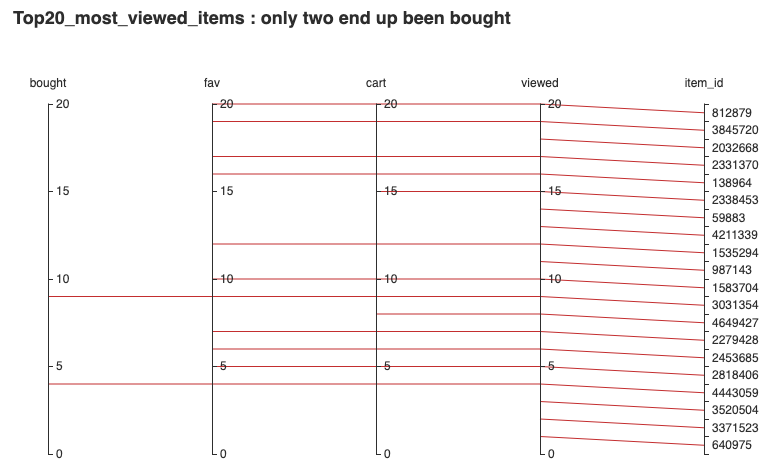

In [23]:
Image(filename='/Users/paxton615/Github_Personal/Alibaba_UserBehavior_Analysis/pics/Top20_most_viewed.png')

#### How often does every item been bought?

In [24]:
# how many times each item been bought
item_buytimes = users[users['status']=='buy'][['item_id','user_id']]\
.groupby('item_id', as_index=False).count().sort_values('user_id',ascending=False)
item_buytimes.columns=['item_id','bought_times']
item_buytimes.head(10)

,item_id,bought_times
27871,3122135,34
27044,3031354,25
45727,5140357,23
26402,2964774,23
16952,1910706,23
28470,3189426,20
22773,2560262,17
44955,5051027,16
45060,5062984,16
29019,3251377,16


In [29]:
# There are 38725 kinds of iterms that only been bought once
# only one item was repeatively bought 34 times
item_buytimes.groupby('bought_times').count().rename(columns={'item_id':'items'})


,items
bought_times,
1,38725
2,4817
3,1262
4,501
5,237
6,126
7,97
8,50
9,37


In [31]:
from pyecharts import options as opts
from pyecharts.charts import Bar
from IPython.display import IFrame
c = (
    Bar()
    .add_xaxis(['bought once','bought twice','three times','four times','five times',
               'six times','seven times','eight times','nine times','ten times'][::-1])
    .add_yaxis("", [38725, 4817, 1262, 501, 237, 126, 97, 50, 37, 18][::-1])
    .reversal_axis()
    .set_series_opts(label_opts=opts.LabelOpts(position="right"))
    .set_global_opts(title_opts=opts.TitleOpts(title="Times of eath item been bought"))
    .render("bar_reversal_axis.html")
)
IFrame(src='./bar_reversal_axis.html', width=1200, height=600)


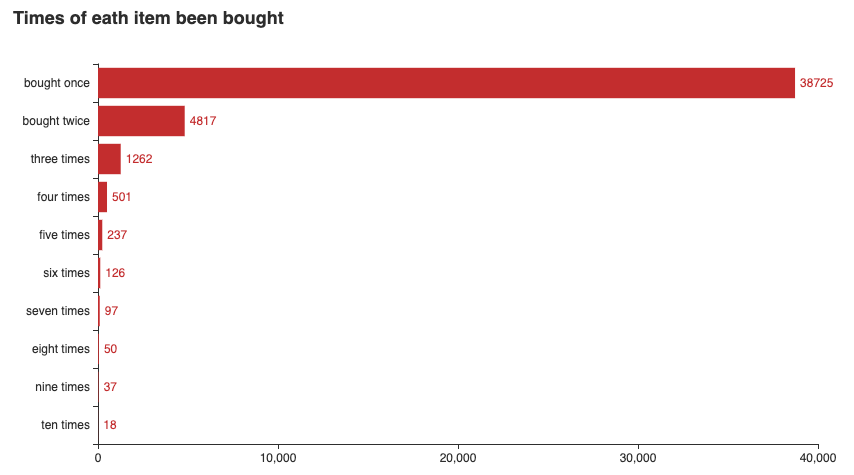

In [32]:
Image(filename='/Users/paxton615/Github_Personal/Alibaba_UserBehavior_Analysis/pics/Times of eath item been bought.png')

#### There are 38725 iterms only been bought once which can be seen as a long tail. This means that significant profits come from selling low volumes of hard-to-find items to many customers.